### bool mask and bool indexing

In [1]:
import numpy as np
import pandas as pd


In [3]:
floats = pd.DataFrame(np.random.randn(7, 4), columns=["A", "B", "C", "D"])
floats

floats[floats["B"] >= 0]

,A,B,C,D
0,-0.038859,0.456416,0.267459,-0.026693
1,0.007341,-0.499993,-0.000589,-1.412125
2,-0.156522,-0.104304,0.675587,-0.147711
3,0.171804,0.852278,-1.579420,0.723010
4,0.131649,0.830461,0.912479,1.227216
5,1.165604,-1.107236,-1.939781,1.711651
6,0.815005,2.049870,-1.772642,0.400161


In [10]:
# bool masks

floats["B"] >= 0

# selecting all rowswhere "B" >= 0

floats[floats["B"] >= 0]

#creating bool mask for row 0
floats.loc[0, :] >= 0

# Selecting a columns that are positive numbers
floats.loc[:, floats.loc[0, :] >= 0]

,B,C
0,0.456416,0.267459
1,-0.499993,-0.000589
2,-0.104304,0.675587
3,0.852278,-1.579420
4,0.830461,0.912479
5,-1.107236,-1.939781
6,2.049870,-1.772642


## Quesry data
filtering rows based on values of certain attributes can be done either with bool index or pandas quesy method

In [15]:
NBA_players = pd.read_json("../Data/nba-players.json")
NBA_players.head(10)

,name,team,points
0,Sun Yue,Lakers,6
1,Arron Afflalo,Rockets,724
2,Alexis Ajinca,Bobcats,10
3,LaMarcus Aldridge,Trailblazers,1393
4,Joe Alexander,Bulls,4
5,Malik Allen,Rockets,105
6,Ray Allen,Celtics,1304
7,Tony Allen,Celtics,330
8,Rafer Alston,Heat,165
9,Rafer Alston,Nets,262


In [52]:
NBA_players[NBA_players["points"] >= 1700]
NBA_players[NBA_players["team"] == "Bulls"]

NBA_players.query("points <= 200")
NBA_players.query("team == 'Bulls'")

NBA_players[(NBA_players["team"] == "Bulls") & (NBA_players["points"] >= 1600)]

NBA_players.query("team == 'Bulls' and points >= 1200")
NBA_players.query("team == 'Bulls' or points >= 1200")

auto_copy = NBA_players.copy()
auto_copy.loc[(NBA_players["team"] == "Bulls") & (NBA_players["points"] >= 1600), ["points"]] = 1700
auto_copy.tail(10)


,name,team,points
503,Reggie Williams,Warriors,365
504,Sean Williams,Nets,52
505,Shelden Williams,Celtics,201
506,Terrence Williams,Nets,656
507,Antoine Wright,Raptors,435
508,Dorell Wright,Heat,510
509,Julian Wright,Hornets,259
510,Nick Young,Wizards,639
511,Sam Young,Grizzlies,595
512,Thaddeus Young,76ers,926


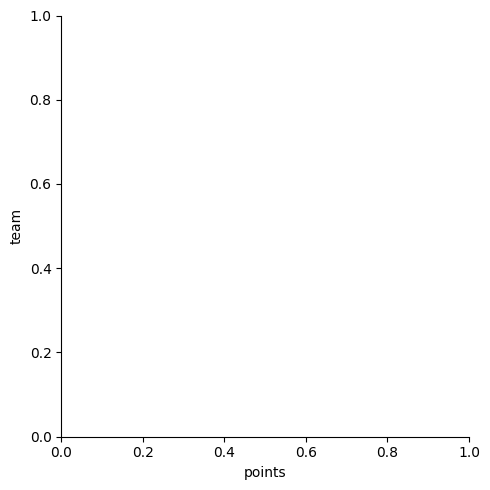

In [45]:
import seaborn as sns

sns.relplot(x="points", y="team", data=NBA_players.query("team == 'lakers' and `points` >= 1000"))

## sorting dataframe
dataframes can be sorted using the .sort_values() method

parameters:
- **by** column, or list of columns
- **ascending** option. default = True

In [56]:
NBA_players.sort_values(by=["team", "points"], ascending=[True, False])

,name,team,points
239,Andre Iguodala,76ers,1401
62,Elton Brand,76ers,996
512,Thaddeus Young,76ers,926
499,Louis Williams,76ers,898
112,Samuel Dalembert,76ers,667
...,...,...,...
328,Dominic McGuire,Wizards,30
255,Mike James,Wizards,18
249,Cedric Jackson,Wizards,12
117,Paul Davis,Wizards,5
